In [12]:
from urllib.request import *
import re
import pandas as pd
import numpy as np
import scipy.stats as stats
import pylab as pl
import json
from pygsp import graphs, filters, plotting
import os
import time
from tempfile import TemporaryFile
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.ticker import FuncFormatter
from collections import Counter
from scipy import sparse, stats, spatial
import scipy.sparse.linalg
import networkx as nx
from pylab import rcParams
plotting.BACKEND = 'matplotlib'
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
transfer_span_reduced=pd.read_pickle("temporary_pkl/transfer_span_reduced.pkl")
transfer_span_reduced=transfer_span_reduced[transfer_span_reduced.fee_cleaned>0]
transfer_link = transfer_span_reduced.groupby('club_name').club_involved_name.value_counts()
transfer_link

club_name              club_involved_name 
. Köln                 .Kaiserslautern        3
                       TSG  Hoffenheim        3
                       VfL Wolfsburg          3
                       .FSV Mainz             2
                       .Nuremberg             2
                                             ..
Évian Thonon Gaillard  Olympique Marseille    3
                       AS Monaco              1
                       Hull City              1
                       SL Benfica             1
                       Udinese Calcio         1
Name: club_involved_name, Length: 4708, dtype: int64

In [3]:
transfer_span_reduced=transfer_span_reduced[transfer_span_reduced.transfer_movement=='out']

In [4]:
with open("transfer_data/clubs_with_location.json", "r") as in_file:
    clubs_info = json.load(in_file)

In [5]:
clubs_position = []

# Dictionary of clubs position
clubsPositionDict = {}
#clubsPositionDict.keys=transfer_span_reduced.club_name.value_counts().index
for club in clubs_info:
    club_id = int(club['href'].split("/")[-3])
    club_name=club['name']
    clubsPositionDict[club_name] = [club["position"][1], club["position"][0]]


In [6]:
club_df_list=transfer_span_reduced['club_name'].value_counts().index
club_dict_list=[club_name for club_name in clubsPositionDict.keys()]
to_add_list=[]
for temp_club in club_df_list:
    if not(temp_club in club_dict_list or temp_club[:-3] in club_dict_list or temp_club+' FC' in club_dict_list or \
           'FC '+temp_club in club_dict_list):
        to_add_list.append(temp_club)

In [7]:
clubsPositionDict['Go Ahead Eagles Deventer']=[52.260130, 6.172192][::-1]
clubsPositionDict['União de Leiria']=[40.468677, -9.141767][::-1]
clubsPositionDict['Arouca']=[40.933113, -8.250242][::-1]
clubsPositionDict['Almería']=[36.840216, -2.435501][::-1]
clubsPositionDict['RC Lens']=[50.433022, 2.815127][::-1]
clubsPositionDict['Elche']=[38.267400, -0.664278][::-1]
clubsPositionDict['St. Pauli']=[53.554916, 9.967886][::-1]
clubsPositionDict['Tondela']=[40.517617, -8.081992][::-1]
clubsPositionDict['Cambuur-Leeuwarden']=[53.205689, 5.814296][::-1]
clubsPositionDict['Huesca']=[42.137274, -0.407179][::-1]
clubsPositionDict['Carpi']=[44.775941, 10.881942][::-1]
clubsPositionDict['SBV Excelsior Rotterdam']=[51.917196, 4.518921][::-1]
clubsPositionDict['AC Ajaccio']=[41.930245, 8.776720][::-1]
clubsPositionDict['Hércules']=[43.905704, 11.202886][::-1]
clubsPositionDict['Livorno']=[43.526806, 10.313527][::-1]
clubsPositionDict['Eintracht Braunschweig']=[52.290226, 10.520621][::-1]
clubsPositionDict['Emmen']=[52.774892, 6.945797][::-1]
clubsPositionDict['De Graafschap Doetinchem']=[51.955269, 6.310031][::-1]
clubsPositionDict['RKC Waalwijk']=[51.686774, 5.088918][::-1]
clubsPositionDict['Aston Villa']=[52.509236, -1.884654][::-1]
clubsPositionDict['Hannover ']=[52.360214, 9.731246][::-1]
clubsPositionDict['Levante']=[39.494950, -0.363810][::-1]
clubsPositionDict['Lorient']=[47.748415, -3.368310][::-1]
clubsPositionDict['Eibar']=[43.182026, -2.475968][::-1]
clubsPositionDict['AC Siena']=[43.321970, 11.326281][::-1]
clubsPositionDict['Wolverhampton Wanderers']=[52.590386, -2.130515][::-1]
clubsPositionDict['Fulham']=[51.514374, -0.185759][::-1]
clubsPositionDict['Catania']=[37.523258, 15.071882][::-1]
clubsPositionDict['A Bournemouth']=[50.735468, -1.838172][::-1]
clubsPositionDict['Queens Park Rangers']=[51.509477, -0.232112][::-1]
clubsPositionDict['Leganés']=[40.340686, -3.760623][::-1]
clubsPositionDict['Vitória Guimarães']=[41.446056, -8.300927][::-1]
clubsPositionDict['Empoli']=[43.726711, 10.954916][::-1]
clubsPositionDict['CA Osasuna']=[42.797225, -1.636720][::-1]
clubsPositionDict['Heerenveen']=[52.958924, 5.935981][::-1]

clubsPositionDict['Getafe']=[-3.71,44.33]
clubsPositionDict['GD Estoril']=[38.716128, -9.406414][::-1]
clubsPositionDict['Real Zaragoza']=[41.636719, -0.901625][::-1]
clubsPositionDict['Wigan Athletic']=[53.547788, -2.653741][::-1]
clubsPositionDict['Hull City']=[53.746403, -0.367764][::-1]
clubsPositionDict['Fortuna Düsseldorf']=[51.261757, 6.733169][::-1]
clubsPositionDict['. Kaiserslautern']=[49.434367, 7.776785][::-1]
clubsPositionDict['Bolton Wanderers']=[53.581614, -2.536878][::-1]
clubsPositionDict['Stade Reims']=[49.249109, 4.023922][::-1]
clubsPositionDict['Nîmes']=[43.851773, 4.359195][::-1]
clubsPositionDict['Valenciennes']=[50.348569, 3.531806][::-1]
clubsPositionDict['Frosinone']=[41.635049, 13.321728][::-1]
clubsPositionDict['Middlesbrough']=[54.578099, -1.218262][::-1]
clubsPositionDict['Bari']=[41.085013, 16.840060][::-1]
clubsPositionDict['Cardiff City']=[51.473038, -3.203018][::-1]
clubsPositionDict['Darmstadt ']=[49.859169, 8.671982][::-1]
clubsPositionDict['Brescia']=[45.573998, 10.237776][::-1]
clubsPositionDict['Novara  ']=[45.452796, 8.596906][::-1]
clubsPositionDict['Real Valladolid']=[41.644822, -4.761243][::-1]
clubsPositionDict['Bastia']=[42.655500, 9.441774][::-1]
clubsPositionDict['Ingolstadt ']=[48.745795, 11.485788][::-1]
clubsPositionDict['Portimonense']=[37.135957, -8.540045][::-1]
clubsPositionDict['Blackburn Rovers']=[37.096659, -7.977045][::-1]
clubsPositionDict['Moreirense']=[41.378253, -8.354494][::-1]
clubsPositionDict['Las Palmas']=[28.102714, -15.456828][::-1]
clubsPositionDict['AJ Auxerre']=[47.787064, 3.588813][::-1]
clubsPositionDict['Belenenses SAD']=[38.702960, -9.207951][::-1]
clubsPositionDict['Olhanense']=[37.029482, -7.848706][::-1]
clubsPositionDict['Beira-Mar']=[40.792877, -8.594123][::-1]
clubsPositionDict['Paderborn ']=[51.730383, 8.711357][::-1]

clubsPositionDict['SPAL']=[44.840394, 11.607945][::-1]
clubsPositionDict['O Dijon']=[47.324652, 5.068294][::-1]
clubsPositionDict['Norwich City']=[52.622935, 1.309499][::-1]
clubsPositionDict['Nancy-Lorraine']=[48.696473, 6.209830][::-1]
clubsPositionDict['. Nuremberg']=[49.429591, 11.126658][::-1]
clubsPositionDict['RB Leipzig']=[51.345963, 12.348290][::-1]
clubsPositionDict['Delfino Pescara ']=[42.456512, 14.229362][::-1]
clubsPositionDict['Benevento']=[41.116772, 14.781155][::-1]
clubsPositionDict['Amiens']=[49.894443, 2.263383][::-1]
clubsPositionDict['Sochaux-Montbéliard']=[47.512760, 6.811105][::-1]
clubsPositionDict['Stade Brest ']=[48.405921, -4.460667][::-1]
clubsPositionDict['Rayo Vallecano']=[40.392225, -3.658729][::-1]
clubsPositionDict['Lecce']=[40.365362, 18.209212][::-1]
clubsPositionDict['Deportivo de La Coruña']=[43.368960, -8.417441][::-1]
clubsPositionDict['Parma  ']=[44.795662, 10.337509][::-1]
clubsPositionDict['Marítimo']=[32.646996, -16.928353][::-1]
clubsPositionDict['Mallorca']=[39.591762, 2.630411][::-1]
clubsPositionDict['Évian Thonon Gaillard']=[46.365387, 6.468247][::-1]
clubsPositionDict['. Union Berlin']=[52.463720, 13.566488][::-1]
clubsPositionDict['SpVgg Greuther Fürth']=[49.486765, 10.998589][::-1]
clubsPositionDict['NEC Nijmegen']=[51.822145, 5.836561][::-1]
clubsPositionDict['Birmingham City']=[52.475891, -1.867900][::-1]
clubsPositionDict['Reading']=[51.422587, -0.982557][::-1]
clubsPositionDict['Gil Vicente']=[40.410942, -3.722002][::-1]
clubsPositionDict['Feirense']=[40.927280, -8.546387][::-1]
clubsPositionDict['Racing Santander']=[43.476589, -3.793349][::-1]
clubsPositionDict['Hertha B']=[43.622330, 3.812159][::-1]
clubsPositionDict['Nice']=[43.705315, 7.192682][::-1]
clubsPositionDict['Sunderland A']=[54.914758, -1.388285][::-1]
clubsPositionDict['Southampton']=[50.906063, -1.391048][::-1]
clubsPositionDict['Granada']=[37.155105, -3.596243][::-1]
clubsPositionDict['Freiburg']=[47.990439, 7.892281][::-1]
clubsPositionDict['Newcastle United']=[54.978703, -1.620357][::-1]
clubsPositionDict['AC Cesena']=[44.145284, 12.263253][::-1]
clubsPositionDict['.  Köln']=[50.936253, 6.876526][::-1]
clubsPositionDict['Roma']=[41.934308, 12.454682][::-1]
clubsPositionDict['Genoa C']=[44.416776, 8.952573][::-1]
clubsPositionDict['A Fiorentina']=[43.842654, 11.300135][::-1]
clubsPositionDict['Napoli']=[40.828164, 14.193061][::-1]
clubsPositionDict['Udinese']=[46.081659, 13.199902][::-1]
clubsPositionDict['Valencia']=[39.475213, -0.357978][::-1]
clubsPositionDict['Benfica']=[38.752903, -9.184667][::-1]
clubsPositionDict['Wolfsburg']=[52.462994, 10.782909][::-1]
clubsPositionDict['Atalanta']=[45.709410, 9.680921][::-1]
clubsPositionDict['TSG  Hoffenheim']=[49.241063, 8.886202][::-1]
clubsPositionDict['Monaco']=[43.727884, 7.415827][::-1]
clubsPositionDict['Sassuolo']=[44.811783, 10.600383][::-1]
clubsPositionDict['Bologna']=[44.492565, 11.309964][::-1]
clubsPositionDict['Lille']=[50.615000, 3.130712][::-1]
clubsPositionDict['Lyon']=[45.765445, 4.981911][::-1]
clubsPositionDict['Schalke']=[51.554838, 7.067505][::-1]
clubsPositionDict['Cagliari']=[39.201471, 9.138367][::-1]
clubsPositionDict['Bayer  Leverkusen']=[51.038472, 7.002407][::-1]
clubsPositionDict['Werder Bremen']=[53.066607, 8.837648][::-1]
clubsPositionDict['Parma']=[44.795594, 10.337520][::-1]
clubsPositionDict['P Eindhoven']=[51.441917, 5.467369][::-1]
clubsPositionDict['Espanyol Barcelona']=[41.351338, 2.074133][::-1]
clubsPositionDict['Villarreal']=[39.943742, -0.103880][::-1]
clubsPositionDict['Braga']=[41.562107, -8.430537][::-1]
clubsPositionDict['Marseille']=[43.277103, 5.394357][::-1]
clubsPositionDict['Saint-Étienne']=[45.461909, 4.390598][::-1]
clubsPositionDict['Palermo']=[38.156886, 13.343177][::-1]
clubsPositionDict['.F Mainz ']=[49.984836, 8.224481][::-1]
clubsPositionDict['Lazio']=[41.908684, 12.458228][::-1]
clubsPositionDict['Hamburger']=[53.511620, 9.998488][::-1]
clubsPositionDict['Real Betis']=[37.385007, -5.987257][::-1]
clubsPositionDict['Málaga']=[36.738489, -4.426781][::-1]
clubsPositionDict['Montpellier']=[43.625260, 3.811887][::-1]

In [8]:
delete_club=[]
for club in clubsPositionDict.keys():
    if clubsPositionDict[club][0]<-15 or clubsPositionDict[club][1]<20:
        delete_club.append(club)
for club in delete_club:
    clubsPositionDict.pop(club)

In [9]:
transfer_span_reduced

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,fee_cleaned,league_name,year,season
22,Arsenal,Armand Traoré,20.0,Left-Back,Juventus,Loan fee:£450k,out,0.450,Premier League,2010,2010/2011
71,Stoke City,Tuncay Sanli,29.0,Left Winger,VfL Wolfsburg,£4.05m,out,4.050,Premier League,2010,2010/2011
73,Stoke City,Andy Griffin,31.0,Right-Back,Reading,£428k,out,0.428,Premier League,2010,2010/2011
128,Wolverhampton Wanderers,Jelle Van Damme,27.0,Centre-Back,Racing Santander,£3.15m,out,3.150,Premier League,2010,2010/2011
129,Wolverhampton Wanderers,Andrew Surman,23.0,Central Midfield,Norwich City,£1.51m,out,1.510,Premier League,2010,2010/2011
...,...,...,...,...,...,...,...,...,...,...,...
60223,PSV Eindhoven,Luuk de Jong,28.0,Centre-Forward,Sevilla,£11.25m,out,11.250,Eredivisie,2019,2019/2020
60224,PSV Eindhoven,Angeliño,22.0,Left-Back,Manchester City,£10.80m,out,10.800,Eredivisie,2019,2019/2020
60226,PSV Eindhoven,Kenneth Paal,22.0,Left-Back,PEC Zwolle,£315k,out,0.315,Eredivisie,2019,2019/2020
60322,Utrecht,Nicolas Gavory,24.0,Left-Back,Racing Santander,£2.79m,out,2.790,Eredivisie,2019,2019/2020


In [10]:
league_list=transfer_span_reduced.league_name.value_counts().index
league_club_dict={}
for league in league_list:
    temp_club_list=transfer_span_reduced[transfer_span_reduced.league_name==league].club_name.value_counts().index
    league_club_dict[league]=[temp_club_list]

In [14]:
# import os
# os.environ['PROJ_LIB'] = r'D:\anaconda\pkgs\proj4-5.2.0-h6538335_1006\Library\share'
from mpl_toolkits.basemap import Basemap

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [13]:
clubsPositionDict['Chelsea FC']

[-0.1909565, 51.481663]

In [14]:
def create_club_network(club_name):
    df=transfer_span_reduced[transfer_span_reduced.club_name==club_name]
    club_graph = nx.from_pandas_edgelist(df, 
                                      source='club_name', target='club_involved_name', edge_attr=['fee_cleaned'])
    return club_graph

def draw_club_network(club_graph,edge_color='black', node_color='blue', alpha=1):
    node_size= np.array(list(nx.degree_centrality(club_graph).values()))*500
    nx.draw_networkx_edges(club_graph, pos=clubsPositionDict, edge_color=edge_color, alpha=0.4)
    nx.draw_networkx_nodes(club_graph, pos=clubsPositionDict, node_size=node_size, node_color=node_color, alpha=alpha)

In [15]:
club_location_list=[]
for temp_club in transfer_span_reduced.club_name.value_counts().index:
    if_location=0
    try:
        temp_location=clubsPositionDict[temp_club]
        if_location=1
    except:
        if_location=0
    try:
        temp_location=clubsPositionDict[temp_club+' FC']
        if_location+=1
    except:
        if_location+=0
    try:
        temp_location=clubsPositionDict['FC '+temp_club]
        if_location+=1
    except:
        if_location+=0
    try:
        temp_location=clubsPositionDict[temp_club[:-3]]
        if_location=+1
    except:
        if_location+=0
    if (if_location):
        club_location_list.append(temp_club)


In [16]:
num_club_position=len(club_location_list)
club_position_df=transfer_span_reduced.copy()
club_position_df['count']=1.0
club_position_df=club_position_df.groupby(['club_name','club_involved_name'])['fee_cleaned','count']
club_position_df = club_position_df.sum()
for temp_index in club_position_df.index:
    if not(temp_index[0] in club_location_list and temp_index[1] in club_location_list):
        club_position_df=club_position_df.drop(temp_index)

In [17]:
def get_club_position(club):
    club_variant=club
    try:
        long=clubsPositionDict[club_variant][0]
        lat=clubsPositionDict[club_variant][1]
    except:
        a=0
    club_variant=club+' FC'
    try:
        long=clubsPositionDict[club_variant][0]
        lat=clubsPositionDict[club_variant][1]
    except:
        a=0
    club_variant=club[:-3]
    try:
        long=clubsPositionDict[club_variant][0]
        lat=clubsPositionDict[club_variant][1]
    except:
        a=0
    club_variant='FC '+club
    try:
        long=clubsPositionDict[club_variant][0]
        lat=clubsPositionDict[club_variant][1]
    except:
        a=0
    return long,lat

In [18]:
club_position_df['club_1_long']=0.0
club_position_df['club_1_lat']=0.0
club_position_df['club_2_long']=0.0
club_position_df['club_2_lat']=0.0
club_position_df['club_1']=''
club_position_df['club_2']=''
for temp_index in club_position_df.index:
    club_1=temp_index[0]
    club_2=temp_index[1]
    club_position_df['club_1'][temp_index]=club_1
    club_position_df['club_2'][temp_index]=club_2
    club_1_long,club_1_lat=get_club_position(club_1)
    club_2_long,club_2_lat=get_club_position(club_2)
    club_position_df['club_1_long'][temp_index]=club_1_long
    club_position_df['club_1_lat'][temp_index]=club_1_lat
    club_position_df['club_2_long'][temp_index]=club_2_long
    club_position_df['club_2_lat'][temp_index]=club_2_lat

In [19]:
def modify_club_name(club_name):
    if club_name in clubsPositionDict.keys():
        new_name=club_name
    if club_name[:-3] in clubsPositionDict.keys():
        new_name=club_name[:-3]
    if club_name+' FC' in clubsPositionDict.keys():
        new_name=club_name+' FC'
    if 'FC '+club_name in clubsPositionDict.keys():
        new_name='FC '+club_name
    return new_name

for temp_index in club_position_df.index:
    club_1=temp_index[0]
    club_2=temp_index[1]
    club_position_df['club_1'][temp_index]=modify_club_name(club_1)
    club_position_df['club_2'][temp_index]=modify_club_name(club_2)
club_position_df.head()
                                                            

fee_cleaned  count  club_1_long  club_1_lat  \
club_name club_involved_name                                                
.  Köln   . Nuremberg                0.72    2.0     6.876526   50.936253   
          Amiens                     5.40    1.0     6.876526   50.936253   
          Hamburger                  1.62    1.0     6.876526   50.936253   
          Hannover                   0.09    1.0     6.876526   50.936253   
          Werder Bremen              4.05    1.0     6.876526   50.936253   

                              club_2_long  club_2_lat   club_1         club_2  
club_name club_involved_name                                                   
.  Köln   . Nuremberg           11.126658   49.429591  .  Köln    . Nuremberg  
          Amiens                 2.263383   49.894443  .  Köln         Amiens  
          Hamburger              9.998488   53.511620  .  Köln      Hamburger  
          Hannover               9.731246   52.360214  .  Köln      Hannover   
          Werder Bremen          8.837648   53.066607  .  Köln  Werder Bremen

In [20]:
def create_transfer_network(df,edge_attribute='fee_cleaned'):
    transfer_graph = nx.from_pandas_edgelist(df, 
                                      source='club_1', target='club_2', edge_attr=[edge_attribute])
    #nx.set_node_attributes(transfer_graph)
    edgewidth=[]
    for (u,v,d) in transfer_graph.edges(data=True):
        edgewidth.append(d[edge_attribute])
    return transfer_graph, edgewidth

In [21]:
def draw_naive_transfer_network(transfer_graph, edge_color='orange', node_color='aqua', alpha=1,c=0.03):
    node_size= np.array(list(nx.degree_centrality(transfer_graph).values()))*300
    nx.draw_networkx_edges(transfer_graph, pos=clubsPositionDict, edge_color=edge_color, alpha=0.4,with_labels=True,\
                           width=np.array(edgewidth)*c)
    nx.draw_networkx_nodes(transfer_graph, pos=clubsPositionDict, node_size=node_size, node_color=node_color, alpha=alpha,with_labels=True)

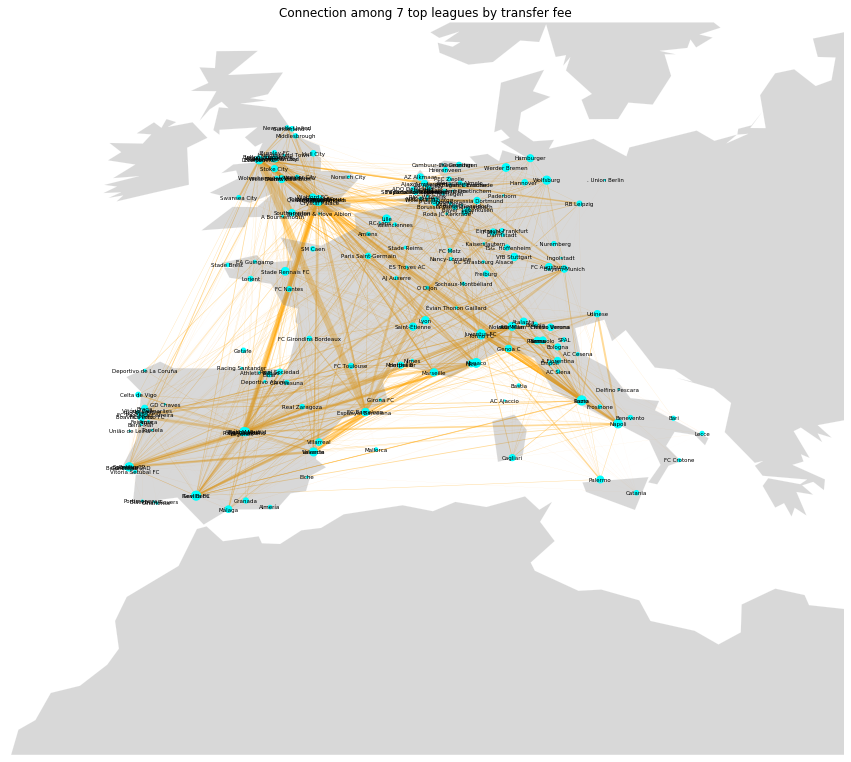

In [22]:
transfer_fee_graph,edgewidth=create_transfer_network(club_position_df)

plt.figure(figsize=(15, 15))
plt.title("Connection among 7 top leagues by transfer fee")
m=Basemap(llcrnrlon=-15,urcrnrlon=25,llcrnrlat=25,urcrnrlat=60)
m.drawmapboundary(linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")
draw_naive_transfer_network(transfer_fee_graph)
_=nx.draw_networkx_labels(transfer_fee_graph,clubsPositionDict,font_size=5.5)

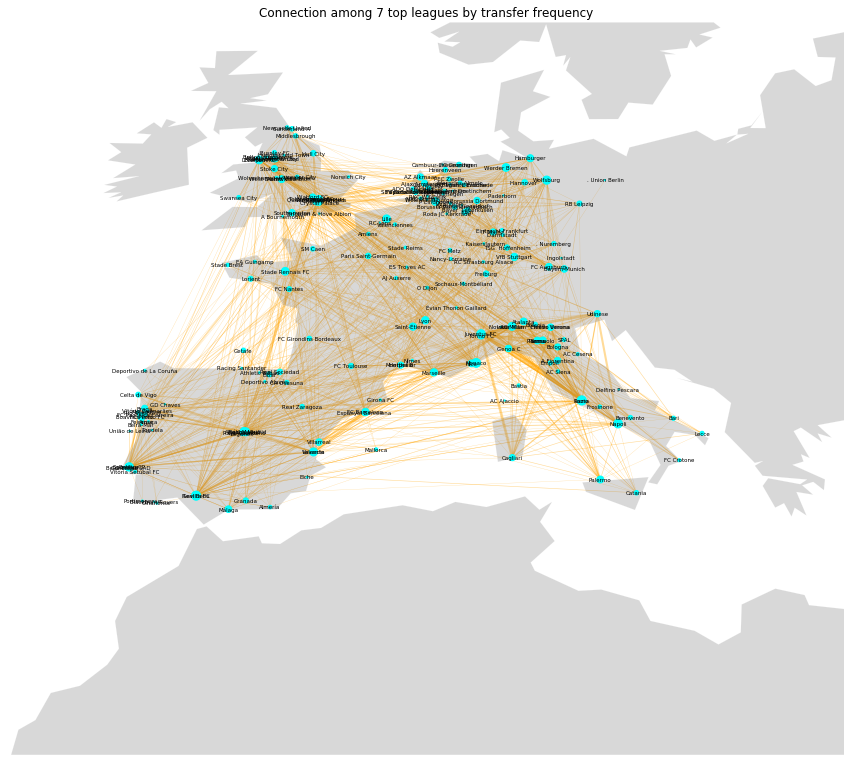

In [23]:
transfer_count_graph,edgewidth=create_transfer_network(club_position_df,edge_attribute='count')

plt.figure(figsize=(15, 15))
plt.title("Connection among 7 top leagues by transfer frequency")
m=Basemap(llcrnrlon=-15,urcrnrlon=25,llcrnrlat=25,urcrnrlat=60)
m.drawmapboundary(linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")
draw_naive_transfer_network(transfer_count_graph,c=0.3)
_=nx.draw_networkx_labels(transfer_count_graph,clubsPositionDict,font_size=5.5)

In [24]:
def draw_naive_transfer_network(transfer_graph, edge_color='orange', node_color='aqua', alpha=1,c=0.03):
    node_size= np.array(list(nx.degree_centrality(transfer_graph).values()))*300
    nx.draw_networkx_edges(transfer_graph, pos=clubsPositionDict, edge_color=edge_color, alpha=0.4,with_labels=True,\
                           width=np.array(edgewidth)*c)
    nx.draw_networkx_nodes(transfer_graph, pos=clubsPositionDict, node_size=node_size, node_color=node_color, alpha=alpha,with_labels=True)

In [25]:
def get_node_color(graph):
    nodes=graph.nodes
    node_color=[]
    league_color_dict={'Serie A':'pink','Premier League':'aqua','La Liga':'thistle','Bundesliga':'wheat',\
                       'Ligue 1':'lightsalmon', 'Primeira Liga':'peru','Eredivisie':'lightgreen' }
    for temp_club in nodes:
        club_name=temp_club
        try:
            temp_league=transfer_span_reduced[transfer_span_reduced.club_name==club_name].league_name.value_counts().index[0]
        except:
            a=0
        club_name=temp_club+' FC'
        try:
            temp_league=transfer_span_reduced[transfer_span_reduced.club_name==club_name].league_name.value_counts().index[0]
        except:
            a=0
        club_name='FC '+temp_club
        try:
            temp_league=transfer_span_reduced[transfer_span_reduced.club_name==club_name].league_name.value_counts().index[0]
        except:
            a=0
        temp_color=league_color_dict[temp_league]
        node_color.append(temp_color)
    return node_color
node_color=get_node_color(transfer_count_graph)

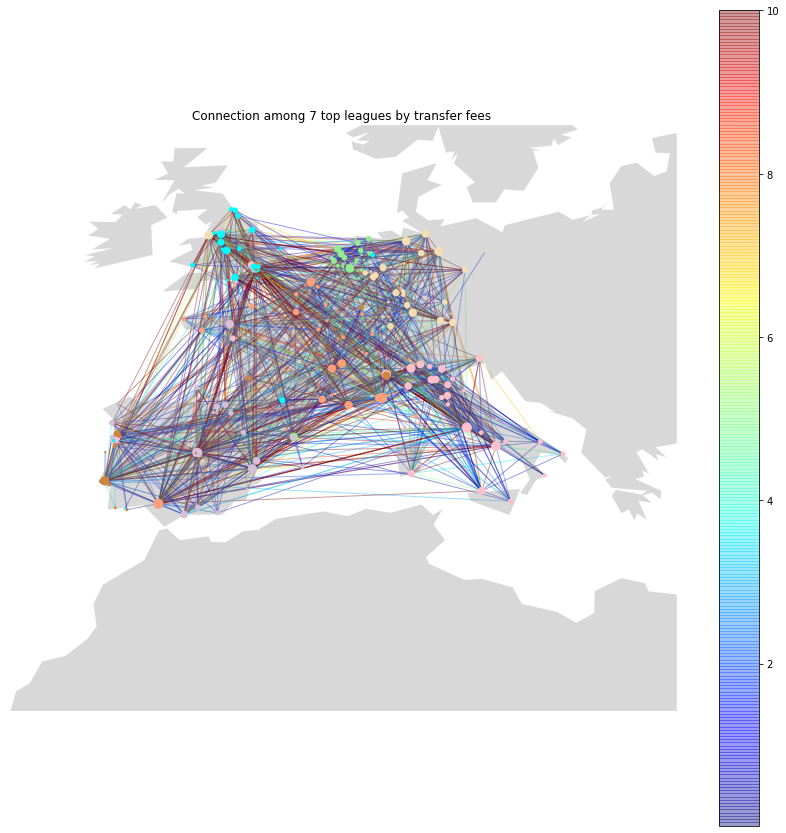

In [26]:
transfer_fee_graph,edgewidth=create_transfer_network(club_position_df,edge_attribute='fee_cleaned')
edge_color_list=np.array(edgewidth)
coef=5.0/np.median(edgewidth)
edge_color_list=edge_color_list*coef
edge_color_list[edge_color_list>10]=10
plt.figure(figsize=(15, 15))
plt.title("Connection among 7 top leagues by transfer fees")
m=Basemap(llcrnrlon=-15,urcrnrlon=25,llcrnrlat=25,urcrnrlat=60)
m.drawmapboundary(linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")
#draw_naive_transfer_network(transfer_count_graph,c=0.3)
node_size= np.array(list(nx.degree_centrality(transfer_fee_graph).values()))*300
temp_edges=nx.draw_networkx_edges(transfer_fee_graph, pos=clubsPositionDict, edge_color=edge_color_list, alpha=0.4,with_labels=True,\
                           width=1,edge_cmap=plt.cm.jet)
nx.draw_networkx_nodes(transfer_fee_graph, pos=clubsPositionDict, node_size=node_size,node_color=node_color, alpha=1,with_labels=True)
plt.colorbar(temp_edges)
#_=nx.draw_networkx_labels(transfer_count_graph,clubsPositionDict,font_size=5.5)

In [27]:
transfer_fee_graph,edgewidth=create_transfer_network(club_position_df)

In [28]:
club_position_df=club_position_df.drop(['club_1_long','club_1_lat','club_2_long','club_2_lat'],axis=1)
transfer_fee_graph,edgewidth=create_transfer_network(club_position_df)
nx.write_gexf(transfer_fee_graph,'new_transfer_fee_graph.gexf')

In [29]:
club_position_df

fee_cleaned  count  \
club_name               club_involved_name                       
.  Köln                 . Nuremberg                0.72    2.0   
                        Amiens                     5.40    1.0   
                        Hamburger                  1.62    1.0   
                        Hannover                   0.09    1.0   
                        Werder Bremen              4.05    1.0   
...                                                 ...    ...   
Wolverhampton Wanderers SM Caen                    0.45    1.0   
                        Stoke City                15.26    2.0   
Évian Thonon Gaillard   Hull City                  1.62    1.0   
                        Marseille                  2.88    2.0   
                        Montpellier                2.70    1.0   

                                                             club_1  \
club_name               club_involved_name                            
.  Köln                 . Nuremberg                         .  Köln   
                        Amiens                              .  Köln   
                        Hamburger                           .  Köln   
                        Hannover                            .  Köln   
                        Werder Bremen                       .  Köln   
...                                                             ...   
Wolverhampton Wanderers SM Caen             Wolverhampton Wanderers   
                        Stoke City          Wolverhampton Wanderers   
Évian Thonon Gaillard   Hull City             Évian Thonon Gaillard   
                        Marseille             Évian Thonon Gaillard   
                        Montpellier           Évian Thonon Gaillard   

                                                   club_2  
club_name               club_involved_name                 
.  Köln                 . Nuremberg           . Nuremberg  
                        Amiens                     Amiens  
                        Hamburger               Hamburger  
                        Hannover                Hannover   
                        Werder Bremen       Werder Bremen  
...                                                   ...  
Wolverhampton Wanderers SM Caen                   SM Caen  
                        Stoke City             Stoke City  
Évian Thonon Gaillard   Hull City               Hull City  
                        Marseille               Marseille  
                        Montpellier           Montpellier  

[1665 rows x 4 columns]

In [30]:
new=nx.Graph()
for index in club_position_df.index:
    a=index[0]
    b=index[1]
    w=club_position_df.fee_cleaned[index]
    new.add_edge(a,b,weigh=w)

In [31]:
nx.write_gexf(new,'new.gexf')

In [52]:
nx.write_gexf(transfer_fee_graph,'transfer_fee_graph.gexf')

## Simple Statistical Analysis

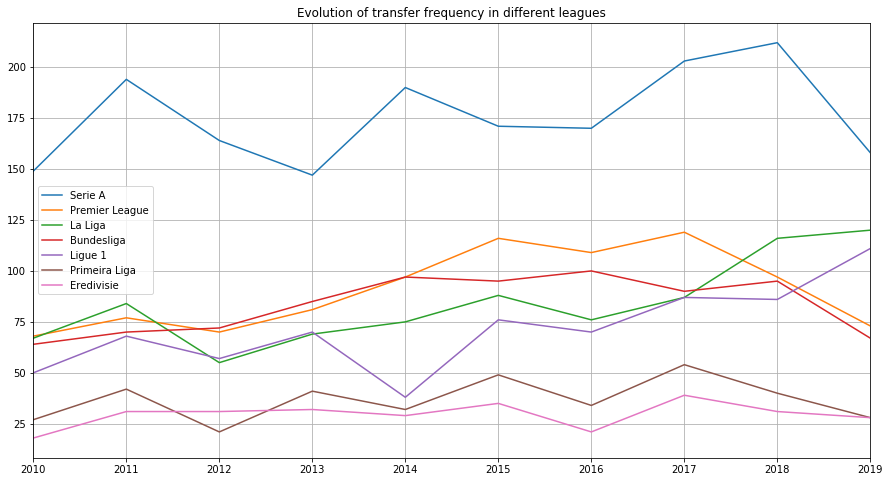

In [39]:
leagues=transfer_span_reduced.league_name.value_counts().index
years=[2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
league_by_year = transfer_span_reduced.groupby('year').league_name.value_counts()
league_stat = pd.DataFrame([], index = years, columns = leagues)
for temp_league in leagues:
    for temp_year in years:
        league_stat[temp_league][temp_year]=league_by_year[(temp_year,temp_league)]
league_stat.plot(figsize=(15,8),title='Evolution of transfer frequency in different leagues')
plt.grid()

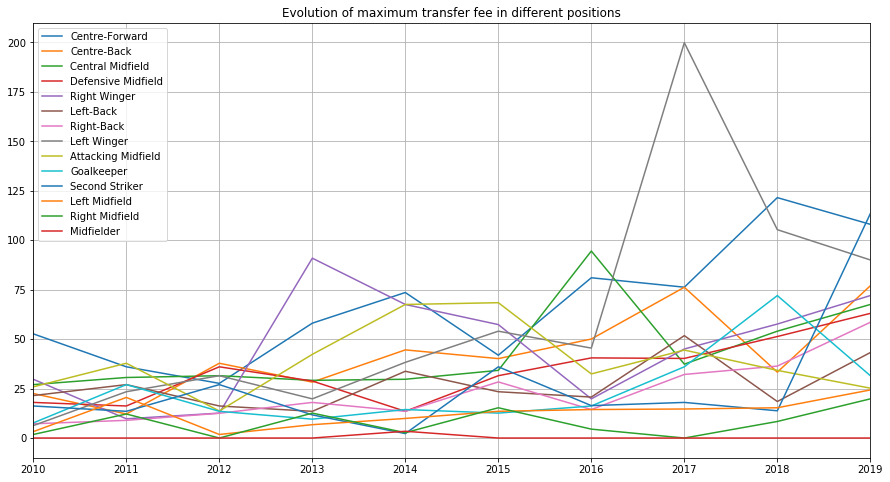

In [40]:
positions=transfer_span_reduced.position.value_counts().index
years=[2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
position_max_fee_by_year = transfer_span_reduced.groupby(['year','position']).fee_cleaned.max()
position_stat = pd.DataFrame([], index = years, columns = positions)
for temp_position in positions:
    for temp_year in years:
        try:
            position_stat[temp_position][temp_year]=position_max_fee_by_year[(temp_year,temp_position)]
        except:
            position_stat[temp_position][temp_year]=0
position_stat.plot(figsize=(15,8),title='Evolution of maximum transfer fee in different positions')
plt.grid()

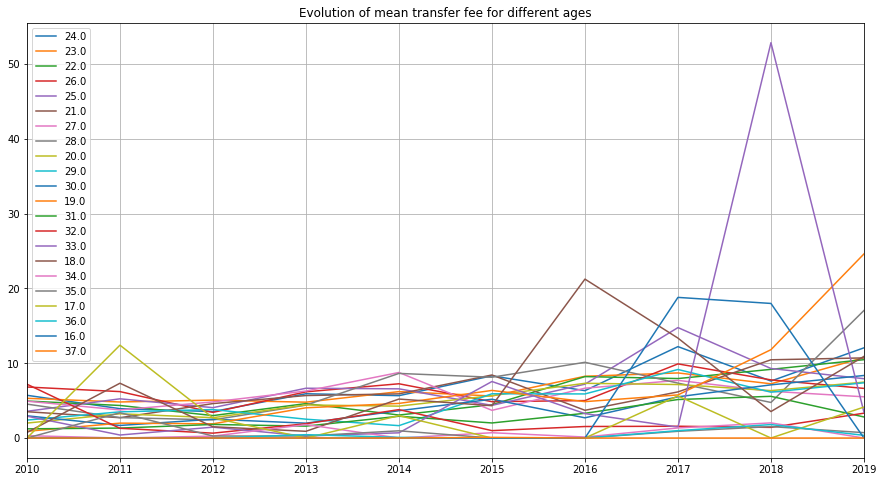

In [41]:
ages=transfer_span_reduced.age.value_counts().index
years=[2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
age_mean_fee_by_year = transfer_span_reduced.groupby(['year','age']).fee_cleaned.mean()
age_stat = pd.DataFrame([], index = years, columns = ages)
for temp_age in ages:
    for temp_year in years:
        try:
            age_stat[temp_age][temp_year]=age_mean_fee_by_year[(temp_year,temp_age)]
        except:
            age_stat[temp_age][temp_year]=0
age_stat.plot(figsize=(15,8),title='Evolution of mean transfer fee for different ages')
plt.grid()

In [42]:
num_club_transfer=transfer_span_reduced.club_name.value_counts()
#sort(num_club_transfer)
num_club_transfer[:20]

Juventus             152
Genoa C              142
Roma                 129
A Fiorentina         105
Napoli                98
Sampdoria             94
Chelsea               91
Sevilla               88
AC Milan              87
Inter Milan           86
Valencia              83
Udinese               83
Atlético Madrid       82
Benfica               74
Manchester City       73
Atalanta              72
Wolfsburg             72
Borussia Dortmund     71
Barcelona             71
Sporting CP           67
Name: club_name, dtype: int64

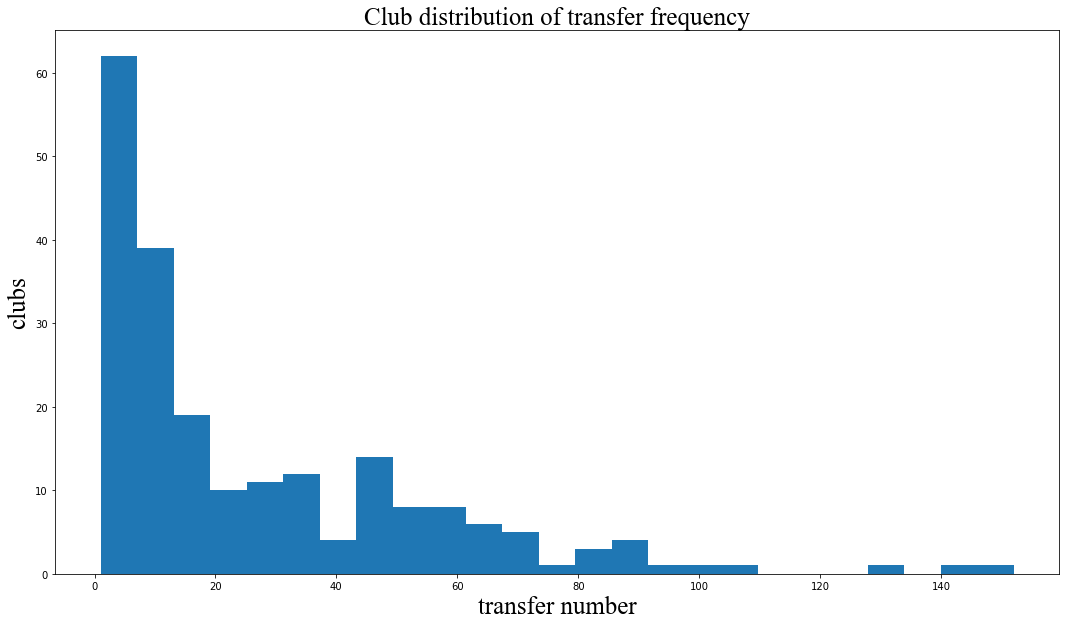

In [43]:
fig,axes = plt.subplots(1,1,figsize=(18,10))
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 25,
}
axes.set_xlabel('transfer number',font2)
axes.set_ylabel('clubs',font2)
axes.set_title('Club distribution of transfer frequency',font2)
_ , _ , _ = plt.hist(num_club_transfer,histtype='stepfilled',stacked=True,bins=25)
plt.show()


In [44]:
transfer_span_reduced.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,fee_cleaned,league_name,year,season
0,Arsenal,Laurent Koscielny,24.0,Centre-Back,Lorient,£11.25m,in,11.25,Premier League,2010,2010/2011
1,Arsenal,Sébastien Squillaci,30.0,Centre-Back,Sevilla,£5.85m,in,5.85,Premier League,2010,2010/2011
22,Arsenal,Armand Traoré,20.0,Left-Back,Juventus,Loan fee:£450k,out,0.45,Premier League,2010,2010/2011
49,Stoke City,Eidur Gudjohnsen,31.0,Centre-Forward,Monaco,£2.25m,in,2.25,Premier League,2010,2010/2011
50,Stoke City,Jermaine Pennant,27.0,Right Winger,Real Zaragoza,£1.80m,in,1.80,Premier League,2010,2010/2011


In [45]:
player_fee=transfer_span_reduced.groupby('player_name')['fee_cleaned'].sum()/2
player_fee.sort_values(ascending=False)[:20]

player_name
Philippe Coutinho    144.000
Antoine Griezmann    135.000
Gonzalo Higuaín      132.300
Eden Hazard          121.500
James Rodríguez      119.700
João Félix           113.400
Álvaro Morata        110.700
Cristiano Ronaldo    105.300
Neymar                99.900
Diego Costa           94.050
Luis Suárez           85.475
Falcao                84.420
Leonardo Bonucci      83.250
Kylian Mbappé         81.000
Nicolas Pépé          81.000
João Cancelo          79.110
Alexis Sánchez        76.950
Virgil van Dijk       76.190
André Gomes           75.830
Romelu Lukaku         73.085
Name: fee_cleaned, dtype: float64

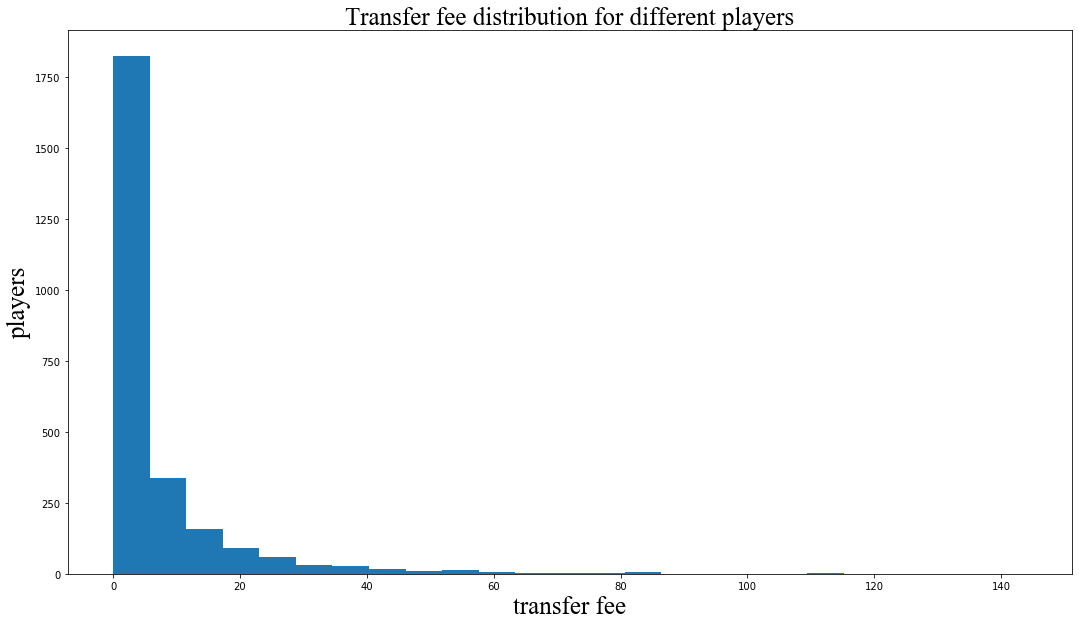

In [46]:
fig,axes = plt.subplots(1,1,figsize=(18,10))
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 25,
}
axes.set_xlabel('transfer fee',font2)
axes.set_ylabel('players',font2)
axes.set_title('Transfer fee distribution for different players',font2)
_ , _ , _ = plt.hist(player_fee,histtype='stepfilled',stacked=True,bins=25)
plt.show()


In [47]:
transfer_buy=transfer_span_reduced[transfer_span_reduced.transfer_movement=='in']
transfer_sell=transfer_span_reduced[transfer_span_reduced.transfer_movement=='out']
transfr_buy_fee=transfer_buy.groupby('club_name')['fee_cleaned'].sum()
transfr_sell_fee=transfer_sell.groupby('club_name')['fee_cleaned'].sum()

In [48]:
transfr_buy_fee.sort_values(ascending=False)[:20]

club_name
Manchester City        947.220
Paris Saint-Germain    928.350
Juventus               804.755
Barcelona              803.950
Manchester United      798.110
Atlético Madrid        738.640
Chelsea                703.710
Liverpool              677.130
Real Madrid            618.980
Arsenal                474.780
AC Milan               454.550
Monaco                 431.690
Napoli                 426.045
Roma                   392.381
Bayern Munich          377.550
Inter Milan            369.955
Valencia               369.158
Everton                319.020
Tottenham Hotspur      304.520
Wolfsburg              288.045
Name: fee_cleaned, dtype: float64

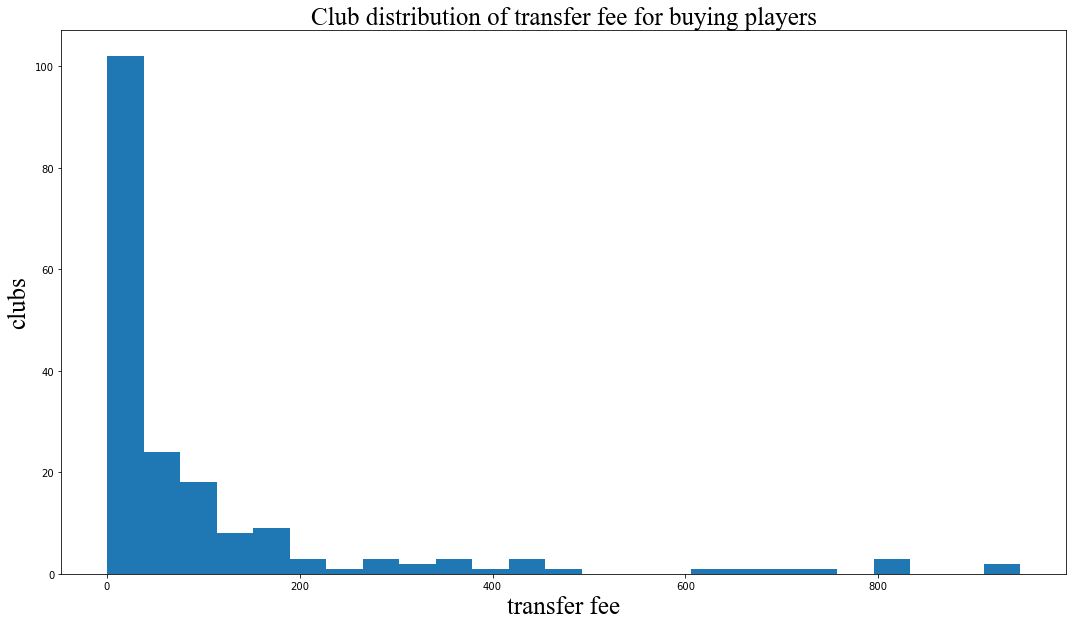

In [49]:
fig,axes = plt.subplots(1,1,figsize=(18,10))
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 25,
}
axes.set_xlabel('transfer fee',font2)
axes.set_ylabel('clubs',font2)
axes.set_title('Club distribution of transfer fee for buying players',font2)
_ , _ , _ = plt.hist(transfr_buy_fee,histtype='stepfilled',stacked=True,bins=25)
plt.show()


In [50]:
transfr_sell_fee.sort_values(ascending=False)[:20]

club_name
Atlético Madrid      532.130
Benfica              520.880
Juventus             513.579
Roma                 495.744
Chelsea              490.190
Real Madrid          482.265
Liverpool            427.745
Borussia Dortmund    409.865
Porto                384.780
Monaco               360.500
Sevilla              357.108
Barcelona            348.585
Ajax Amsterdam       335.995
Lille                334.770
Valencia             329.135
Genoa C              324.658
Lyon                 312.800
Tottenham Hotspur    307.607
Manchester City      283.763
Napoli               281.889
Name: fee_cleaned, dtype: float64

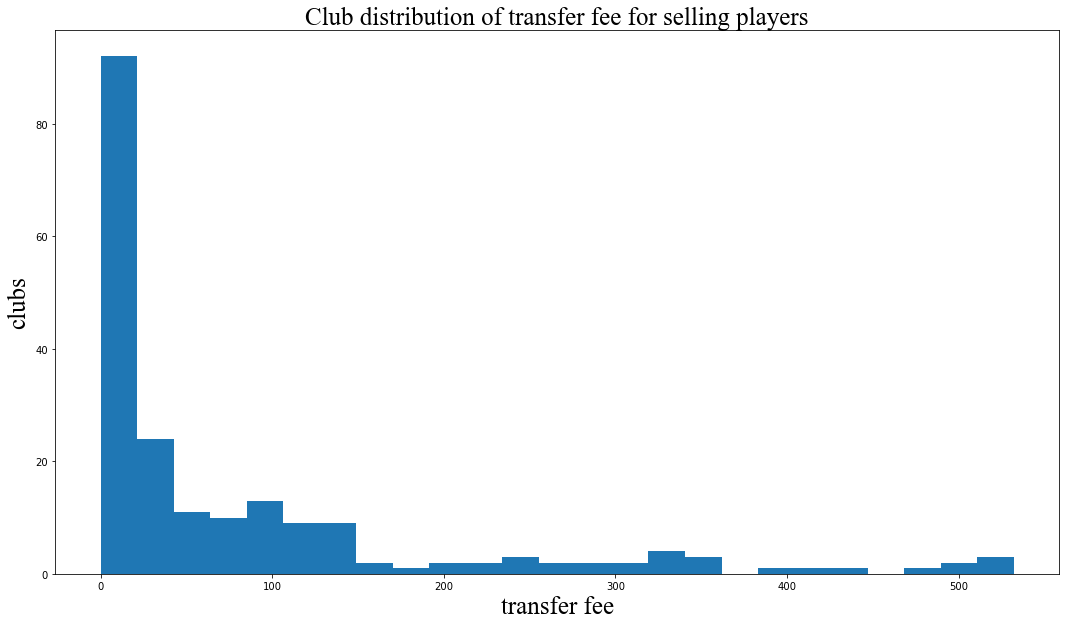

In [51]:
fig,axes = plt.subplots(1,1,figsize=(18,10))
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 25,
}
axes.set_xlabel('transfer fee',font2)
axes.set_ylabel('clubs',font2)
axes.set_title('Club distribution of transfer fee for selling players',font2)
_ , _ , _ = plt.hist(transfr_sell_fee,histtype='stepfilled',stacked=True,bins=25)
plt.show()
